In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import math

In [2]:
# this data is extracted  from kaggle "https://www.kaggle.com/aniketyadav1/bangalore"
df = pd.read_csv("houseprice.csv")
# fill empty rows 
data= df.fillna('0')

In [3]:
#number of data
len(data)

13318

In [4]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2,3,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2,1,51


In [5]:
# As, in size there are strings, we need to remove the string bedrromand BHK.
size=data['size']
bedroom =[]
for a in range(len(size)):
    bedroom.append(size[a][0])
data['size'] = bedroom
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5,3,120
2,Built-up Area,Ready To Move,Uttarahalli,3,0,1440,2,3,62
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3,1,95
4,Super built-up Area,Ready To Move,Kothanur,2,0,1200,2,1,51


In [6]:
# finding correaltion between every column with the price
df['price'].corr(df['availability'],method ='kendall')  

0.07090211782106579

In [7]:
df['price'].corr(df['size'],method ='kendall') 

0.5490811473781875

In [8]:
df['price'].corr(df['society'],method ='kendall') 

-0.007014448658079153

In [9]:
df['price'].corr(df['total_sqft'],method ='kendall') 

0.25720535704008163

In [10]:
df['price'].corr(df['bath'],method ='kendall') 

0.5819061142325546

In [11]:
df['price'].corr(df['location'],method ='kendall')

0.021226725913085828

In [12]:
df['price'].corr(df['balcony'],method ='kendall') 


0.16252746319406344

In [13]:
# output
Y = data['price']

In [14]:
# As size has highest correlation with price along with balcony, bathroom numbers and total squarefeet. 
# Visulaizing each of them 
def visualize(x,xlabel):
    Y = df['price']
    plt.scatter(x,Y, color = 'orange')
    plt.title('price variance according with' + ' ' + xlabel)
    plt.xlabel(xlabel)
    plt.ylabel('House Price')

In [15]:
X_size= data['size']
print(data['size'])
X_sqft=data['total_sqft']
X_bath=data['bath']
X_balcony=data['balcony']

0        2
1        4
2        3
3        3
4        2
        ..
13313    5
13314    4
13315    2
13316    4
13317    1
Name: size, Length: 13318, dtype: object


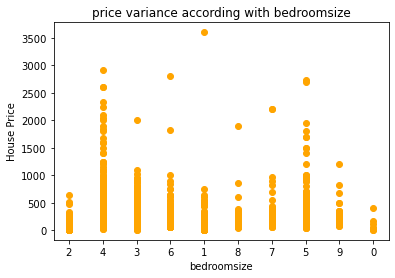

In [16]:
# Visualize price with bedroom sixe
visualize(X_size,'bedroomsize')

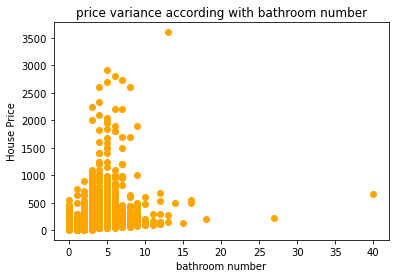

In [17]:
# Visualize price with bedroom sixe
visualize(X_bath,'bathroom number')
    

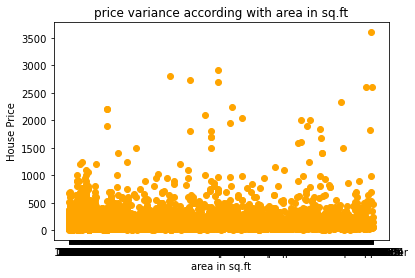

In [18]:
# Visualize price with area sqft
visualize(X_sqft,'area in sq.ft')

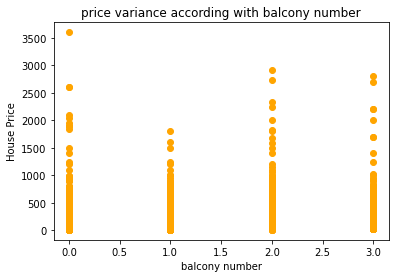

In [19]:
# Visualize price with bedroom sixe
visualize(X_balcony,'balcony number')

In [20]:
#splitting data into train and test data
def split_data(X,Y):
    x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size=0.2)
    return x_train, x_test,y_train, y_test

In [21]:
# Fitting Linear Regresiion model with each of them to see which results better with mean squared error and R squared value
def test_model(X_train):
    x_train, x_test,y_train, y_test=split_data(X_train,Y)
    sc = StandardScaler()
    inp = np.array(x_train).reshape(-1,1)
    out = np.array(y_train).reshape(-1,1)
    inptest = np.array(x_test).reshape(-1,1)
    outtest = np.array(y_test).reshape(-1,1)
    Xtrain = sc.fit_transform(inp)
    Ytrain = sc.fit_transform(out)
    X_test = sc.fit_transform(inptest)
    Y_test = sc.fit_transform(outtest)
    # Model Fitting
    model = LinearRegression()
    model.fit(Xtrain,Ytrain)
    # Prediction
    y_pred = model.predict(X_test)
    # Error
    mean_sqerror = mean_squared_error(Y_test,y_pred)
    R_square_error = model.score(Xtrain,Ytrain)
    return y_pred,mean_sqerror,R_square_error

In [22]:
# Checking errors for columns that are correlated with price
y_pred,mean_sqerror,R_square_error = test_model(X_size)
print('Mean Squared Error with respect to bedroom size:\t',math.sqrt(mean_sqerror))
print("R squared value with respect to bedroom size:\t\t",R_square_error)
y_pred,mean_sqerror,R_square_error = test_model(X_bath)
print('Mean Squared Error with respect to number of bathrooms:\t',math.sqrt(mean_sqerror))
print("R squared value with respect to number of bathrooms:\t",R_square_error)
y_pred,mean_sqerror,R_square_error = test_model(X_balcony)
print('Mean Squared Error with respect to number of balcony:\t',math.sqrt(mean_sqerror))
print("R squared value with respect to number of balcony:\t",R_square_error)

Mean Squared Error with respect to bedroom size:	 0.9340137628556371
R squared value with respect to bedroom size:		 0.16517293302511593
Mean Squared Error with respect to number of bathrooms:	 0.9201648814938499
R squared value with respect to number of bathrooms:	 0.21539803907334198
Mean Squared Error with respect to number of balcony:	 1.0000281207708859
R squared value with respect to number of balcony:	 9.374560893560258e-06


In [23]:
# Collecting all of them as features for input
featureX= data.iloc[:,[3,6,7]]


In [24]:
featureX

,size,bath,balcony
0,2,2,1
1,4,5,3
2,3,2,3
3,3,3,1
4,2,2,1
...,...,...,...
13313,5,4,0
13314,4,5,0
13315,2,2,1
13316,4,4,1


In [25]:
#  Splittinf data and Scaling
xtrain, xtest, ytrain, ytest = train_test_split(featureX, Y, test_size=0.2)
sc = StandardScaler()
Xtrain = sc.fit_transform(xtrain)
outtrain = np.array(ytrain).reshape(-1,1)
Ytrain = sc.fit_transform(outtrain)
X_test = sc.fit_transform(xtest)
outtest = np.array(ytest).reshape(-1,1)
Y_test = sc.fit_transform(outtest)

In [26]:
# Fit Linear Regression model
model = LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [27]:
# Prediction
y_pred = model.predict(X_test)
y_pred
print(model.coef_[0])


15.71768399718402


In [29]:
# Accuracy
print(int(y_pred.sum()))
print(int(ytest.sum()))
print("So called Accuracy ", y_pred.sum()/ytest.sum())


297753
308199
So called Accuracy  0.9661056392458839


In [30]:
mean_sqerror = mean_squared_error(ytest,y_pred)
R_square_error = model.score(Xtrain,ytrain)
print('Mean Squared Error with respect to number of balcony:\t',math.sqrt(mean_sqerror))
print("R squared value with respect to number of balcony:\t",R_square_error)

Mean Squared Error with respect to number of balcony:	 145.79867315517617
R squared value with respect to number of balcony:	 0.20741787051949512


In [31]:
# Fitting with scaling output and input both
model2 = LinearRegression()
model2.fit(Xtrain,Ytrain)

LinearRegression()

In [32]:
# Prediction with scaling output and input both
y_predscale = model2.predict(X_test)
y_predscale


array([[-0.17515648],
       [ 0.20171997],
       [-0.25348315],
       ...,
       [-0.25348315],
       [ 1.78747861],
       [ 0.1074824 ]])

In [33]:
# Accuracy with scaling output and input both
mean_sqerror = mean_squared_error(Y_test,y_predscale)
R_square_error = model.score(Xtrain,Ytrain)
print('Mean Squared Error with respect to number of balcony:\t',math.sqrt(mean_sqerror))
print("R squared value with respect to number of balcony:\t",R_square_error)

Mean Squared Error with respect to number of balcony:	 0.8889882662762478
R squared value with respect to number of balcony:	 -16797.492755673124


In [34]:
print(model2.coef_[0])
print(model2.intercept_[0])

[ 0.10834394  0.36601955 -0.01375086]
-1.9880906194056276e-20
